# Statistique Descriptive Bivariée

**Librairies**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.animation import FuncAnimation

On considère dans cette partie une population $\Omega = { \omega_1, \omega_2, \ldots, \omega_n }$ avec $n \geq 3$ et deux caractères numériques $X = [x_1, x_2, \ldots, x_n]$ et $Y = [y_1, y_2, \ldots, y_n].$

La donnée des deux caractères numériques $X$ et $Y$ équivaut à la donnée d’un **caractère vectoriel** Z

$$
Z : \omega_i \mapsto 
\begin{pmatrix}
X(\omega_i) \\
Y(\omega_i)
\end{pmatrix}
=
\begin{pmatrix}
x_i \\
y_i
\end{pmatrix}.
$$

Nous allons analyser graphiquement le lien éventuel entre les valeurs prises par $X$ et celles prises par $Y$.

On suppose aussi :

- Une probabilité uniforme : $\mathbb{P}(\omega_i) = \frac{1}{n}$ pour tout $i$. 

(on peut considérer que chaque individu est équiprobable, c’est-à-dire que chaque individu a la même probabilité d’être choisi au hasard.) 

### Nuage de points

Une première approche graphique consiste à représenter les valeurs de $Y$ en fonction des valeurs de $X$.

On trace alors l'ensemble des points $M_i$ de coordonnées :

$$
M_i = (x_i, y_i)
$$

Ce graphe est appelé **nuage de points** associé aux caractères $X$ et $Y$.

---

Que permet d’observer un nuage de points ?

* **Concentration** ou **dispersion** des données
* Une **tendance générale** (croissante, décroissante, etc.)
* La présence éventuelle de **valeurs aberrantes** (ou "outliers")

In [ ]:
X = np.array([1, 2, 3, 4, 5, 6])
Y = np.array([2, 4, 5, 4, 5, 7])

# Tracé du nuage de points
plt.figure(figsize=(6, 4))
plt.plot(X, Y, "o")  # changer "o" par "+", ".", etc.
plt.title("Nuage de points de Y en fonction de X")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.tight_layout()
plt.show()

**Point moyen d’un nuage de points**

Il est défini par :

$$
G = \begin{pmatrix} \overline{x} \\ \overline{y} \end{pmatrix}
$$

C’est-à-dire le point dont les coordonnées sont les moyennes des valeurs de $X$ et de $Y$.

In [ ]:
x_moyen = np.mean(X)
y_moyen = np.mean(Y)

# Affichage du nuage de points
plt.figure(figsize=(6, 4))
plt.plot(X, Y, "o", label="Nuage de points")

# Affichage du point moyen
plt.plot(x_moyen, y_moyen, "r*", markersize=12, label="Point moyen G")

# Titres et légendes
plt.title("Nuage de points et point moyen")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Affichage des coordonnées du point moyen
print("Coordonnées du point moyen G :", (x_moyen, y_moyen))

### Variance et covariance

Soit une population :

$$
\Omega = \{ \omega_1, \omega_2, \ldots, \omega_n \}
$$

munie de la probabilité uniforme :

$$
\forall \omega \in \Omega, \quad \mathbb{P}(\{ \omega \}) = \frac{1}{n}
$$

Une **série statistique** $X$ est une application de $\Omega$ dans $\mathbb{R}$, donc une **variable aléatoire**.

L’**espérance** de $X$ est :

$$
\mathbb{E}(X) = \sum_{i=1}^{n} \frac{1}{n} X(\omega_i) = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

C’est simplement la **moyenne empirique** :

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

---

Variance

La **variance** de $X$ (par rapport à $\mathbb{P}$) est :

$$
V(X) = \sum_{i=1}^{n} \frac{1}{n}(x_i - \bar{x})^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

On note en général l’**écart-type** :

$$
\sigma_n(X) = \sqrt{V(X)}
$$

---

Covariance

La **covariance empirique** de $X$ et $Y$ est définie par :

$$
\text{cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) = \mathbb{E}(XY) - \bar{x} \bar{y}
$$

Pour la commande `cov`, l’option `ddof=0` est **essentielle** si l’on souhaite utiliser la **formule mathématique exacte** donnée précedemment.

En effet, le facteur utilisé devant la somme est :

$$
\frac{1}{n - \text{ddof}}
$$

Par défaut, `ddof = 1`, ce qui correspond à une estimation à partir d’un **échantillon**.
Mais si on veut la formule exacte pour une population, il faut absolument spécifier `ddof = 0`

⚠️ Cette formule n'est pas normalisée !!!


**Covariance normalisée (corrélation)**

La **covariance normalisée** entre deux variables aléatoires ( $X$ ) et ( $Y$ ) est appelée **coefficient de corrélation de Pearson**. Elle est définie comme :

$
\rho(X, Y) = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}
$

où :
- ( $\text{cov}(X, Y)$ ) est la covariance classique,
- ( $\sigma_X$ ) et ( $\sigma_Y$ ) sont les écarts-types de ( $X$ ) et ( $Y$ ).

Cette version est dite **normalisée** car elle donne une valeur comprise entre (-1) et (1), indépendamment des unités de mesure. Cela permet de comparer la force et le sens de la relation linéaire entre deux variables, quelles que soient leurs échelles.

- ( $\rho$ = 1 ) : corrélation linéaire parfaite positive
- ( $\rho$ = 0 ) : pas de corrélation linéaire
- ( $\rho$ = -1 ) : corrélation linéaire parfaite négative



In [ ]:
X = np.array([5, 7, 3, 9, 6])

# Moyenne
mean_X = np.mean(X)

# Variance sans correction (σ²_n)
var_nc = np.var(X, ddof=0)

print("Moyenne :", mean_X)
print("Variance (ddof=0) :", var_nc)

In [ ]:
X = np.array([5, 7, 3, 9, 6])
Y = np.array([2, 4, 1, 8, 5])

# Covariance entre X et Y sans correction
cov_XY = np.cov(X, Y, ddof=0)

print("Matrice de covariance (ddof=0) :\n", cov_XY)
print("Variance de X :", cov_XY[0, 0])
print("Variance de Y :", cov_XY[1, 1])
print("Covariance entre X et Y :", cov_XY[0, 1])


In [ ]:
df = pd.DataFrame({
    "X": [5, 7, 3, 9, 6],
    "Y": [2, 4, 1, 8, 5]
})

# Variance sans correction
print("Variances (ddof=0) :\n", df.var(ddof=0))

# Covariance sans correction
print("Covariance (ddof=0) :\n", df.cov(ddof=0))

### Droites de régression

Lorsque les points du nuage statistique semblent **presque alignés**, on suppose qu'il existe des coefficients $a$ et $b$ tels que :

$$
y_i \approx a x_i + b
$$

On appelle :

* $X$ la **variable explicative**
* $Y$ la **variable à expliquer**

L’objectif est de trouver la **droite de régression** $y = ax + b$ qui **minimise les erreurs d’ajustement** :

Somme des carrés des résidus

$$
d^2(a, b) = \frac{1}{n} \sum_{i=1}^n \left( y_i - (a x_i + b) \right)^2
$$

On cherche à **minimiser** cette quantité pour trouver les meilleurs coefficients $a$ et $b$.



In [ ]:
np.random.seed(0)
x = np.linspace(0, 10, 30)
y = 2.5 * x + 1.5 + np.random.normal(0, 4, size=x.shape)

# Ajustement par moindres carrés (droite de régression linéaire)
coeffs = np.polyfit(x, y, deg=1)  # coeffs = [a, b]
a, b = coeffs

# Prédictions
y_pred = a * x + b

# Calcul des résidus
residus = y - y_pred

# Affichage
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Données observées', color='blue')
plt.plot(x, y_pred, label=f'Droite ajustée : y = {a:.2f}x + {b:.2f}', color='red')
for i in range(len(x)):
    plt.vlines(x[i], y[i], y_pred[i], color='gray', linestyle='dotted')  # traits verticaux = erreurs

plt.title("Méthode des moindres carrés")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

np.random.seed(1)
x = np.linspace(0, 10, 30)
y = 2.5 * x + 1.5 + np.random.normal(0, 4, size=x.shape)

a_opt, b_opt = np.polyfit(x, y, 1)
a_vals = np.linspace(0.0, a_opt, 100)
b_vals = np.linspace(0.0, b_opt, 100)

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, y, label="Données", color="blue")
line, = ax.plot([], [], 'r-', label="Régression animée")
text = ax.text(0.05, 0.95, '', transform=ax.transAxes)
ax.set_xlim(0, 10)
ax.set_ylim(min(y) - 5, max(y) + 5)
ax.set_title("Méthode des moindres carrés (animation)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid(True)

def update(frame):
    a = a_vals[frame]
    b = b_vals[frame]
    y_pred = a * x + b
    line.set_data(x, y_pred)
    text.set_text(f'y = {a:.2f}x + {b:.2f}')
    return line, text

ani = FuncAnimation(fig, update, frames=len(a_vals), interval=50, blit=True)

# enregistrer en GIF
ani.save("moindres_carres.gif", writer=PillowWriter(fps=20))

### Formules de régression (Démonstration en bas de page)

* **Pente** de la droite :

$$
a = \frac{\text{Cov}(X, Y)}{\text{V}(X)}
$$

* **Ordonnée à l’origine** :

$$
b = \bar{y} - a \bar{x}
$$

---

**Variances et décomposition**

On a la relation fondamentale suivante :

$$
\mathbb{V}(Y) = a^2 \mathbb{V}(X) + d^2(a, b)
$$

* Le terme $a^2 \mathbb{V}(X)$ est la **variance expliquée**
* Le terme $d^2(a, b)$ est la **variance résiduelle**

Passons de la variance globale à la décomposition point par point.  (Voir démonstration plus bas) 

Pour chaque observation ( $y_i$ ), on peut décomposer son écart à la moyenne ( $\bar{y}$ ) comme suit :

$$
y_i - \bar{y} = (\hat{y}_i - \bar{y}) + (y_i - \hat{y}_i)
$$

avec :

- ( $\hat{y}_i = a x_i + b$ ) : la valeur prédite par la régression,
- ( $y_i - \bar{y}$ ) : l’écart total (variation totale),
- ( $\hat{y}_i - \bar{y}$ ) : la part **expliquée** par le modèle (variation expliquée),
- ( $y_i - \hat{y}_i$ ) : la part **non expliquée** (résidu, erreur).


In [ ]:
# Données simulées
# np.random.seed(42)
x = np.linspace(0, 10, 30)
y = 2.5 * x + 1.5 + np.random.normal(0, 4, size=x.shape)

# Régression linéaire (moindres carrés)
a, b = np.polyfit(x, y, 1)
y_pred = a * x + b
y_mean = np.mean(y)

# Création du graphique
fig, ax = plt.subplots(figsize=(10, 6))

# Nuage de points
ax.scatter(x, y, label='Données (y)', color='blue')

# Droite de régression
ax.plot(x, y_pred, label='Prédictions (ŷ)', color='red')

# Moyenne de Y (ligne horizontale)
ax.axhline(y_mean, color='green', linestyle='--', label='Moyenne de Y')

# Résidus : distance entre y_i et ŷ_i (avec légende une seule fois)
for i in range(len(x)):
    if i == 0:
        ax.plot([x[i], x[i]], [y[i], y_pred[i]], color='gray', linestyle='dotted', label='Résidu (y - ŷ)')
    else:
        ax.plot([x[i], x[i]], [y[i], y_pred[i]], color='gray', linestyle='dotted')

# Variance expliquée : entre ŷ_i et moyenne de Y (avec légende une seule fois)
for i in range(len(x)):
    if i == 1:
        ax.plot([x[i], x[i]], [y_pred[i], y_mean], color='orange', linestyle='dashed', label='Variance expliquée (ŷ - ȳ)')
    else:
        ax.plot([x[i], x[i]], [y_pred[i], y_mean], color='orange', linestyle='dashed')

# Mise en forme
ax.set_title("Décomposition de la variance en régression linéaire")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

**Coefficient de corrélation linéaire**

Le **coefficient de corrélation** $\rho(X, Y)$ mesure la qualité de l’ajustement :

$$
\rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_n(X)\sigma_n(Y)}
$$

On vérifie que :

$$
\rho(X, Y)^2 = \frac{a^2 \mathbb{V}(X)}{\mathbb{V}(Y)}
$$

* Si $|\rho| \approx 1$, alors les points sont très bien alignés.
* Si $|\rho| \approx 0$, il n'y a **aucune corrélation linéaire**.

---

### Remarque :

* Le coefficient $\rho$ est **sans unité**.
* Il est compris entre $-1$ et $1$.
* En pratique, une valeur $|\rho| > 0.85$ est souvent jugée comme **bonne**.

In [ ]:
r = np.corrcoef(x, y)[0, 1]
r

### Tableau de contingence

Un **tableau de contingence** donne la **loi conjointe** d’un couple de variables aléatoires discrètes $(X, Y)$, sous **probabilité uniforme**.

Soient :

* $x_1, x_2, \dots, x_\ell$ les valeurs distinctes prises par $X$,
* $y_1, y_2, \dots, y_m$ les valeurs distinctes prises par $Y$,
* $f_{i,j}$ la fréquence d'apparition du couple $(x_i, y_j)$.

Le tableau est de la forme :

| X \ Y                     | $y_1$           | $y_2$           | … | $y_m$           | Marginale $f_{i,\bullet}$ |
| ------------------------- | --------------- | --------------- | - | --------------- | ------------------------- |
| $x_1$                     | $f_{1,1}$       | $f_{1,2}$       | … | $f_{1,m}$       | $f_{1,\bullet}$           |
| $x_2$                     | $f_{2,1}$       | $f_{2,2}$       | … | $f_{2,m}$       | $f_{2,\bullet}$           |
| ...                       | ...             | ...             |   | ...             | ...                       |
| $x_\ell$                  | $f_{\ell,1}$    | $f_{\ell,2}$    | … | $f_{\ell,m}$    | $f_{\ell,\bullet}$        |
| Marginale $f_{\bullet,j}$ | $f_{\bullet,1}$ | $f_{\bullet,2}$ | … | $f_{\bullet,m}$ | 1                         |

Les marginales se définissent comme :

* $f_{i,\bullet} = \sum_{j=1}^m f_{i,j}$ (fréquence de $x_i$)
* $f_{\bullet,j} = \sum_{i=1}^\ell f_{i,j}$ (fréquence de $y_j$)

On remplace parfois les fréquences par les effectifs.

---

**Covariance à partir du tableau**

La **covariance** se calcule à partir de la loi conjointe $f_{i,j}$ :

$$
\mathrm{Cov}(X, Y) = \sum_{i=1}^{\ell} \sum_{j=1}^{m} x_i y_j f_{i,j} - \bar{X} \cdot \bar{Y}
$$

où :

* $\bar{X} = \sum_i x_i f_{i,\bullet}$,
* $\bar{Y} = \sum_j y_j f_{\bullet,j}$




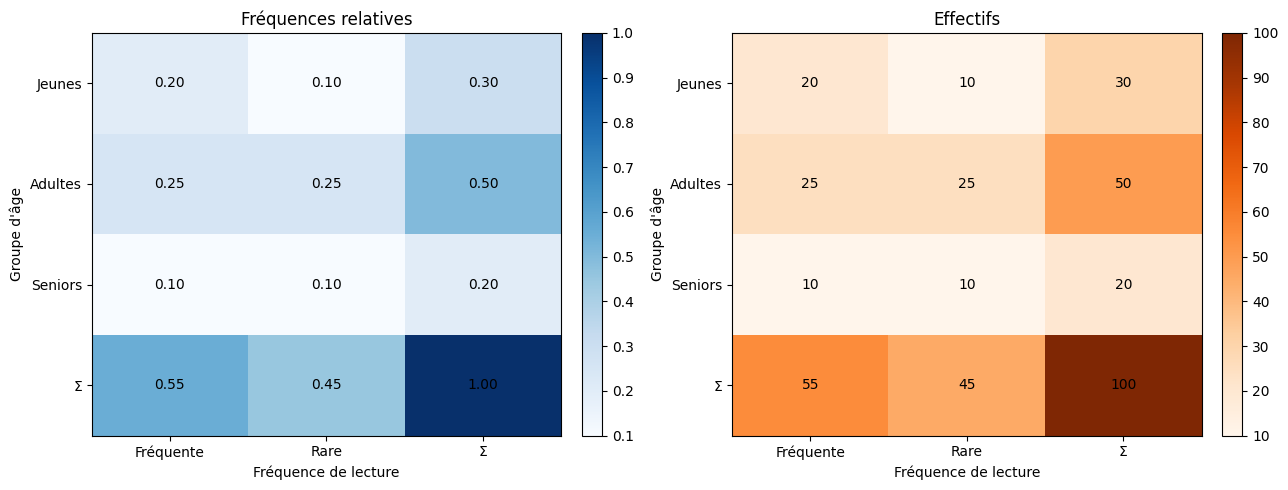

In [16]:
# --- Données brutes : effectifs ---
effectifs = np.array([
# Fréquente # Rare
    [20, 10],  # Jeunes
    [25, 25],  # Adultes
    [10, 10]   # Seniors
])

# Totaux
total = effectifs.sum()

# Fréquences relatives
frequences = effectifs / total

# Marginales
marge_ligne_eff = effectifs.sum(axis=1)
marge_col_eff = effectifs.sum(axis=0)

marge_ligne_freq = frequences.sum(axis=1)
marge_col_freq = frequences.sum(axis=0)

# --- Matrices augmentées ---
eff_aug = np.zeros((4, 3), dtype=int)
eff_aug[:-1, :-1] = effectifs
eff_aug[:-1, -1] = marge_ligne_eff
eff_aug[-1, :-1] = marge_col_eff
eff_aug[-1, -1] = total

freq_aug = np.zeros((4, 3))
freq_aug[:-1, :-1] = frequences
freq_aug[:-1, -1] = marge_ligne_freq
freq_aug[-1, :-1] = marge_col_freq
freq_aug[-1, -1] = 1.0

# --- Étiquettes ---
age_labels = ["Jeunes", "Adultes", "Seniors", "Σ"]
lecture_labels = ["Fréquente", "Rare", "Σ"]

# --- Affichage côte à côte ---
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

# Heatmap des fréquences
im1 = axs[0].imshow(freq_aug, cmap='Blues', aspect='auto', origin='upper')
axs[0].set_xticks(np.arange(len(lecture_labels)))
axs[0].set_yticks(np.arange(len(age_labels)))
axs[0].set_xticklabels(lecture_labels)
axs[0].set_yticklabels(age_labels)
axs[0].set_title("Fréquences relatives")
axs[0].set_xlabel("Fréquence de lecture")
axs[0].set_ylabel("Groupe d'âge")
fig.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)
for i in range(freq_aug.shape[0]):
    for j in range(freq_aug.shape[1]):
        axs[0].text(j, i, f"{freq_aug[i, j]:.2f}", ha='center', va='center', color='black')

# Heatmap des effectifs
im2 = axs[1].imshow(eff_aug, cmap='Oranges', aspect='auto', origin='upper')
axs[1].set_xticks(np.arange(len(lecture_labels)))
axs[1].set_yticks(np.arange(len(age_labels)))
axs[1].set_xticklabels(lecture_labels)
axs[1].set_yticklabels(age_labels)
axs[1].set_title("Effectifs")
axs[1].set_xlabel("Fréquence de lecture")
axs[1].set_ylabel("Groupe d'âge")
fig.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04)
for i in range(eff_aug.shape[0]):
    for j in range(eff_aug.shape[1]):
        axs[1].text(j, i, str(eff_aug[i, j]), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

In [17]:
# --- Calcul de la covariance ---

# Codage des modalités (valeurs numériques)
x_vals = np.array([1, 2, 3])  # Jeunes, Adultes, Seniors
y_vals = np.array([1, 2])     # Fréquente, Rare

# Calcul des espérances
E_X = np.sum(x_vals * marge_ligne_freq)
E_Y = np.sum(y_vals * marge_col_freq)

# Calcul de l'espérance du produit X*Y
E_XY = 0
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        E_XY += x_vals[i] * y_vals[j] * frequences[i, j]

# Covariance
covariance = E_XY - E_X * E_Y

print(f"Cov(X, Y) = {covariance:.4f}")

Cov(X, Y) = 0.0450


# Annexe

### Démonstration de a et b

### Objectif

On veut déterminer les coefficients $a$ et $b$ de la droite de régression $y = ax + b$ qui minimisent l’erreur quadratique moyenne :

$$
d^2(a, b) = \frac{1}{n} \sum_{i=1}^n (y_i - (a x_i + b))^2
$$

On interprète cette minimisation comme une **projection orthogonale** (la distance la plus courte entre un vecteur et un sous-espace (ou un plan) est atteinte par la projection orthogonale.) dans $\mathbb{R}^n$, muni du produit scalaire :

$$
\langle X, Y \rangle = \frac{1}{n} \sum_{i=1}^n x_i y_i = \mathbb{E}(XY)
$$

---

### Interprétation géométrique

Soit $Y \in \mathbb{R}^n$ le vecteur des $y_i$ et $X$ celui des $x_i$. On cherche à projeter $Y$ sur le plan $\mathcal{P}$ engendré par $X$ et $\mathbf{1}_n = (1, \dots, 1)$.

On veut trouver $a$ et $b$ tels que :

$$
Y = aX + b \mathbf{1} + R, \quad \text{avec } R \perp X \text{ et } R \perp \mathbf{1}
$$

Autrement dit, on impose :

1. $\langle Y - (aX + b \mathbf{1}), X \rangle = 0$
2. $\langle Y - (aX + b \mathbf{1}), \mathbf{1} \rangle = 0$

---

### Équation (2) — orthogonalité à $\mathbf{1}$

$$
\langle Y - aX - b\mathbf{1}, \mathbf{1} \rangle = 0
$$

Développement :

$$
\langle Y, \mathbf{1} \rangle - a \langle X, \mathbf{1} \rangle - b \langle \mathbf{1}, \mathbf{1} \rangle = 0
$$

On remplace :

- $\langle Y, \mathbf{1} \rangle = \bar{y}$
- $\langle X, \mathbf{1} \rangle = \bar{x}$
- $\langle \mathbf{1}, \mathbf{1} \rangle = 1$

Donc :

$$
\bar{y} - a \bar{x} - b = 0 \quad \Rightarrow \boxed{b = \bar{y} - a \bar{x}}
$$

---

### Équation (1) — orthogonalité à $X$

$$
\langle Y - aX - b\mathbf{1}, X \rangle = 0
$$

Développement :

$$
\langle Y, X \rangle - a \langle X, X \rangle - b \langle \mathbf{1}, X \rangle = 0
$$

On remplace :

- $\langle Y, X \rangle = \mathbb{E}(XY)$
- $\langle X, X \rangle = \mathbb{E}(X^2)$
- $\langle \mathbf{1}, X \rangle = \bar{x}$

Et on remplace $b$ par $\bar{y} - a \bar{x}$ :

$$
\mathbb{E}(XY) - a \mathbb{E}(X^2) - \bar{x}(\bar{y} - a \bar{x}) = 0
$$

Développement :

$$
\mathbb{E}(XY) - a \mathbb{E}(X^2) - \bar{x} \bar{y} + a \bar{x}^2 = 0
$$

Regroupement :

$$
\mathbb{E}(XY) - \bar{x} \bar{y} = a (\mathbb{E}(X^2) - \bar{x}^2)
$$

On reconnaît :

- $\text{Cov}(X, Y) = \mathbb{E}(XY) - \bar{x} \bar{y}$
- $\text{V}(X) = \mathbb{E}(X^2) - \bar{x}^2$

---

### Résultat final :

$$
\boxed{
a = \frac{\text{Cov}(X, Y)}{\text{V}(X)}, \quad
b = \bar{y} - a \bar{x}
}
$$

### Démonstration de la décomposition de la variance $\mathbb{V}(Y)$ 

###  Objectif

On souhaite démontrer la décomposition suivante de la variance :

$$
\mathbb{V}(Y) = a^2 \mathbb{V}(X) + d^2(a, b)
$$

où :
- $a^2 \mathbb{V}(X)$ est la **variance expliquée** par la régression,
- $d^2(a, b)$ est la **variance résiduelle**, c’est-à-dire l’erreur moyenne de prédiction.

---

### Contexte

On travaille dans $\mathbb{R}^n$ muni du **produit scalaire moyen** :

$$
\langle u, v \rangle = \frac{1}{n} \sum_{i=1}^n u_i v_i = \mathbb{E}(UV)
$$

Soient :
- $X = (x_1, \dots, x_n)$
- $Y = (y_1, \dots, y_n)$
- $\hat{Y} = aX + b\mathbf{1}$ : prédictions de la régression linéaire
- $R = Y - \hat{Y}$ : **résidus**

---

### Idée géométrique (Pythagore)

La droite de régression $aX + b$ est la **projection orthogonale** de $Y$ sur l’espace des fonctions linéaires en $X$.

Ainsi, on a l’orthogonalité :

$$
\langle R, \hat{Y} \rangle = 0
$$

Donc, par le théorème de Pythagore :

$$
\|Y\|^2 = \|\hat{Y}\|^2 + \|R\|^2
$$

---

### Interprétation des normes

Les normes au carré correspondent à des variances dans notre cadre :

- $\|Y\|^2 = \mathbb{V}(Y)$
- $\|\hat{Y}\|^2 = \mathbb{V}(\hat{Y})$
- $\|R\|^2 = \mathbb{V}(Y - \hat{Y}) = d^2(a, b)$

---

### Calcul de $\mathbb{V}(\hat{Y})$

On a :

$$
\hat{Y} = aX + b
$$

Et comme ajouter une constante ne change pas la variance :

$$
\mathbb{V}(\hat{Y}) = \mathbb{V}(aX + b) = a^2 \mathbb{V}(X)
$$

---

### Conclusion

En combinant toutes les étapes :

$$
\mathbb{V}(Y) = \mathbb{V}(\hat{Y}) + \mathbb{V}(Y - \hat{Y})
$$

donc :

$$
\boxed{
\mathbb{V}(Y) = a^2 \mathbb{V}(X) + d^2(a, b)
}
$$

### Passer de la variance globale à une décomposition point par point

On part de la définition de la variance de $Y$ :

$$
\mathbb{V}(Y) = \frac{1}{n} \sum_{i=1}^n (y_i - \bar{y})^2
$$

L'objectif est de décomposer chaque terme $(y_i - \bar{y})^2$ en deux composantes : une **expliquée** par le modèle, et une **résiduelle**.

---

Étape 1 : Décomposition de l’écart total

On part de l’identité algébrique suivante, qui est toujours vraie :

$$
y_i - \bar{y} = (\hat{y}_i - \bar{y}) + (y_i - \hat{y}_i)
$$

C’est une simple réécriture de $y_i = \hat{y}_i + r_i$, où $r_i = y_i - \hat{y}_i$ est le **résidu**.

---

Étape 2 : Développement du carré

En élevant au carré des deux côtés :

$$
(y_i - \bar{y})^2 = (\hat{y}_i - \bar{y})^2 + (y_i - \hat{y}_i)^2 + 2(\hat{y}_i - \bar{y})(y_i - \hat{y}_i)
$$

Puis, en moyennant cette expression sur $i$ (i.e. en sommant puis en divisant par $n$) :

$$
\mathbb{V}(Y) = \mathbb{V}(\hat{Y}) + \mathbb{V}(Y - \hat{Y}) + \frac{2}{n} \sum_{i=1}^n (\hat{y}_i - \bar{y})(y_i - \hat{y}_i)
$$

---

Étape 3 : Le terme croisé disparaît

Dans une régression linéaire, les **résidus sont orthogonaux aux prédictions**, donc :

$$
\sum_{i=1}^n (\hat{y}_i - \bar{y})(y_i - \hat{y}_i) = 0
\quad \Rightarrow \quad
\langle \hat{Y} - \bar{y}, Y - \hat{Y} \rangle = 0
$$

Cela repose sur deux faits :
- Le vecteur constant $\bar{y} \cdot \mathbf{1}$ appartient à l’espace des prédictions $\text{Vect}(X, \mathbf{1})$,
- Donc $\hat{Y} - \bar{y} \cdot \mathbf{1}$ appartient aussi à cet espace,
- Et les résidus $R = Y - \hat{Y}$ sont orthogonaux à cet espace.

D'où l’annulation du terme croisé.

---

Étape 4 : Décomposition de la variance

Il reste alors :

$$
\boxed{
\mathbb{V}(Y) = \mathbb{V}(\hat{Y}) + \mathbb{V}(Y - \hat{Y})
}
$$

---

Étape 5 : Revenir à une égalité point par point

L'égalité suivante découle directement de l'identité algébrique vue plus haut :

$$
\boxed{
y_i - \bar{y} = (\hat{y}_i - \bar{y}) + (y_i - \hat{y}_i)
}
$$

C’est la **décomposition de l’écart total** en :

- une part **expliquée par le modèle** : $\hat{y}_i - \bar{y}$
- une part **non expliquée (résidu)** : $y_i - \hat{y}_i$

---

Récapitulatif interprétatif :

Pour chaque observation $y_i$, on a :

$$
y_i - \bar{y} = (\hat{y}_i - \bar{y}) + (y_i - \hat{y}_i)
$$

| Terme                          | Interprétation                      |
|-------------------------------|-------------------------------------|
| $y_i - \bar{y}$               | Écart total à la moyenne            |
| $\hat{y}_i - \bar{y}$         | **Part expliquée** par la régression |
| $y_i - \hat{y}_i$             | **Résidu** (erreur, part non expliquée) |

---

